# heart.csv

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('heart.csv')

In [7]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [8]:
df.shape

(918, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [18]:
for col in df.columns:
    print("-"*25+f"{col}"+"-"*25)
    print(f"Unique Values in {col} : \n",df[col].unique())
    # print("-"*25)

-------------------------Age-------------------------
Unique Values in Age : 
 [40 49 37 48 54 39 45 58 42 38 43 60 36 44 53 52 51 56 41 32 65 35 59 50
 47 31 46 57 55 63 66 34 33 61 29 62 28 30 74 68 72 64 69 67 73 70 77 75
 76 71]
-------------------------Sex-------------------------
Unique Values in Sex : 
 ['M' 'F']
-------------------------ChestPainType-------------------------
Unique Values in ChestPainType : 
 ['ATA' 'NAP' 'ASY' 'TA']
-------------------------RestingBP-------------------------
Unique Values in RestingBP : 
 [140 160 130 138 150 120 110 136 115 100 124 113 125 145 112 132 118 170
 142 190 135 180 108 155 128 106  92 200 122  98 105 133  95  80 137 185
 165 126 152 116   0 144 154 134 104 139 131 141 178 146 158 123 102  96
 143 172 156 114 127 101 174  94 148 117 192 129 164]
-------------------------Cholesterol-------------------------
Unique Values in Cholesterol : 
 [289 180 283 214 195 339 237 208 207 284 211 164 204 234 273 196 201 248
 267 223 184 288 215 2

In [19]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [21]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [20]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

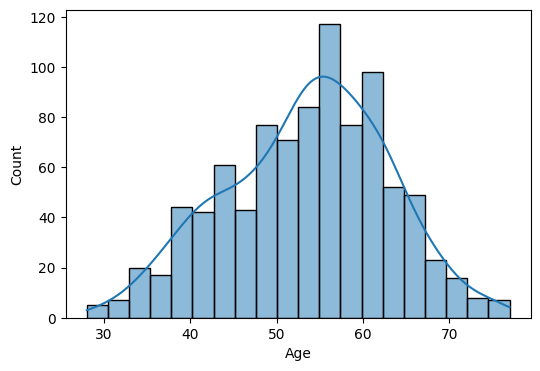

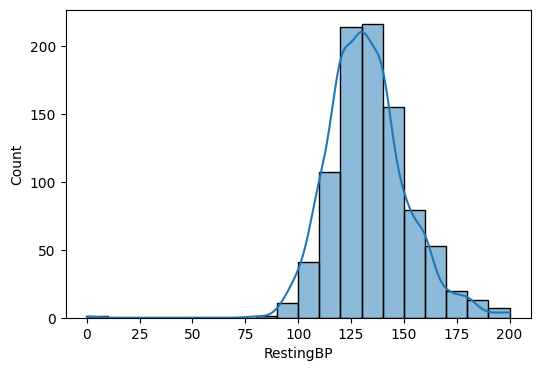

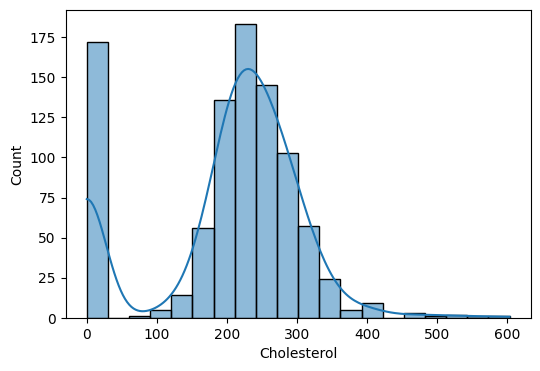

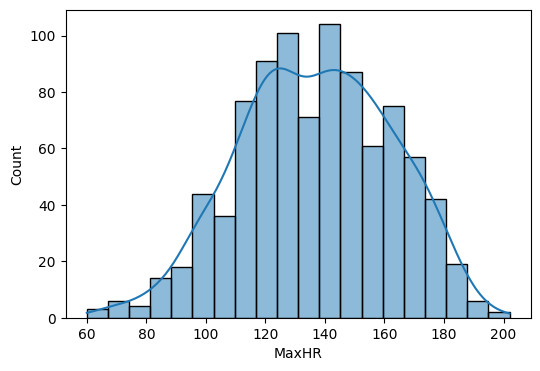

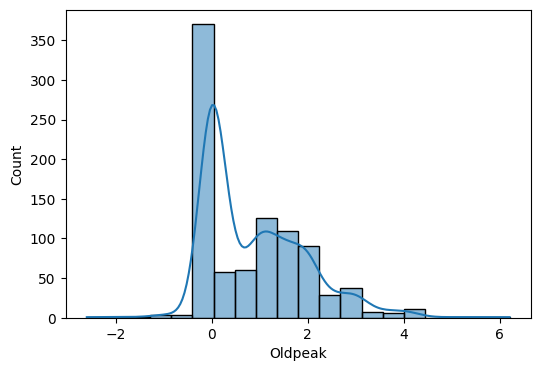

In [26]:
numeric_col = ['Age', 'RestingBP', 'Cholesterol','MaxHR','Oldpeak']
for col in numeric_col:
    plt.figure(figsize=(6,4))
    sns.histplot(x=df[col],bins=20,kde=True)

### EDA & Cleaning 

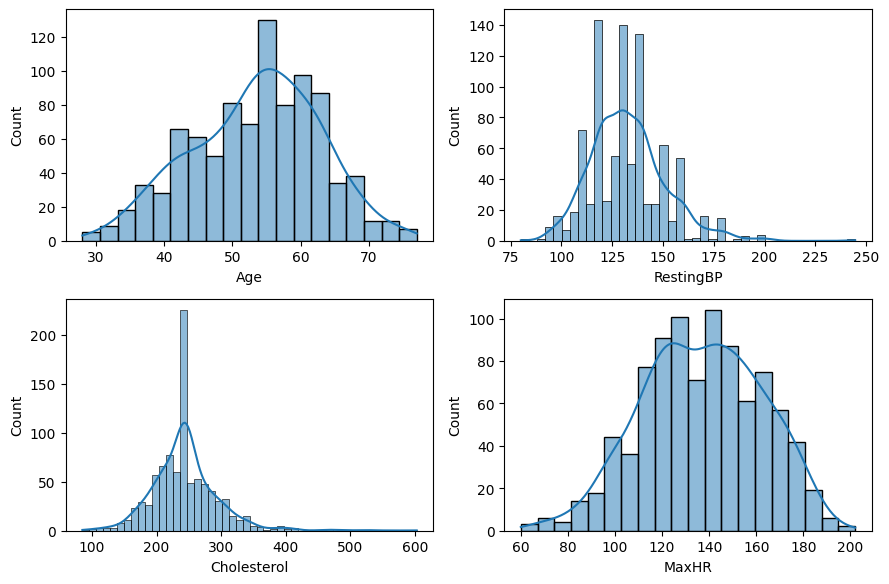

In [62]:
def plot_me(cols:list,box:tuple=(2,2)):
    l =len(cols)
    plt.figure(figsize=(9,6))
    for i in range(1,l+1):
        plt.subplot(box[0],box[1],i)
        sns.histplot(x=df[cols[i-1]],kde=True)
    plt.tight_layout()
plot_me(cols=['Age', 'RestingBP', 'Cholesterol','MaxHR'])

In [ ]:
df.loc[df['RestingBP'] == 0, 'RestingBP']

449    0
Name: RestingBP, dtype: int64

In [45]:
df['Cholesterol'].value_counts().head(3)

Cholesterol
0      172
254     11
220     10
Name: count, dtype: int64

#### Here there are Errors in  data.
1. No Person can have 0 Cholesterol
2. No Person can have 0 RestingBP

In [48]:
ch_mean = df.loc[df['Cholesterol'] != 0,'Cholesterol'].mean()
ch_mean.round(2)

np.float64(244.64)

<Axes: xlabel='Cholesterol', ylabel='Count'>

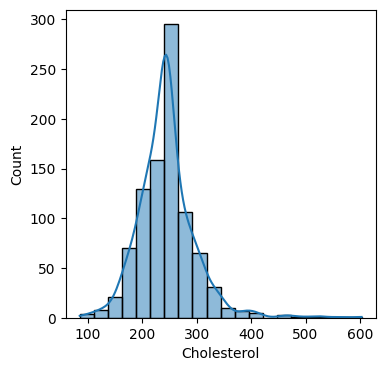

In [53]:
df['Cholesterol']=df['Cholesterol'].replace({0:ch_mean})
plt.figure(figsize=(4,4))
sns.histplot(x=df['Cholesterol'],kde=True,bins=20)

In [54]:
resting_mean = df.loc[df['RestingBP'] != 0,'RestingBP'].mean()
resting_mean.round(2)

np.float64(132.54)

<Axes: xlabel='RestingBP', ylabel='Count'>

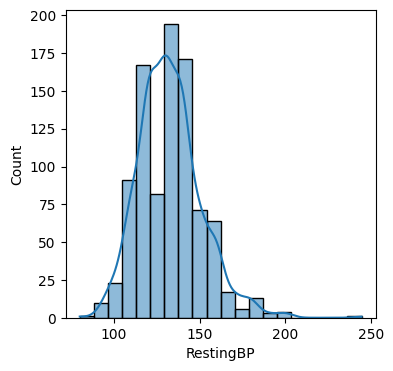

In [55]:
df['RestingBP']=df['RestingBP'].replace({0:ch_mean})
plt.figure(figsize=(4,4))
sns.histplot(x=df['RestingBP'],kde=True,bins=20)

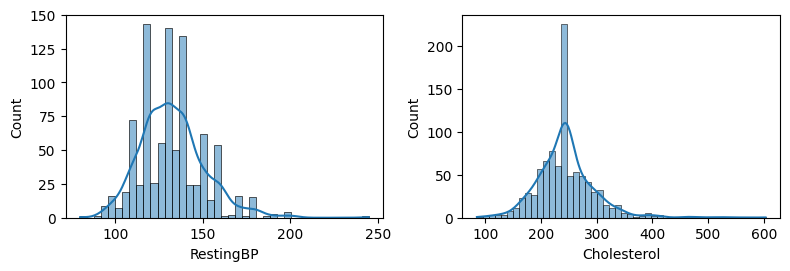

In [58]:
plot_me(cols=['RestingBP', 'Cholesterol'])

In [59]:
cat_col = ['Sex','ChestPainType','FastingBS','RestingECG','ExerciseAngina','HeartDisease']

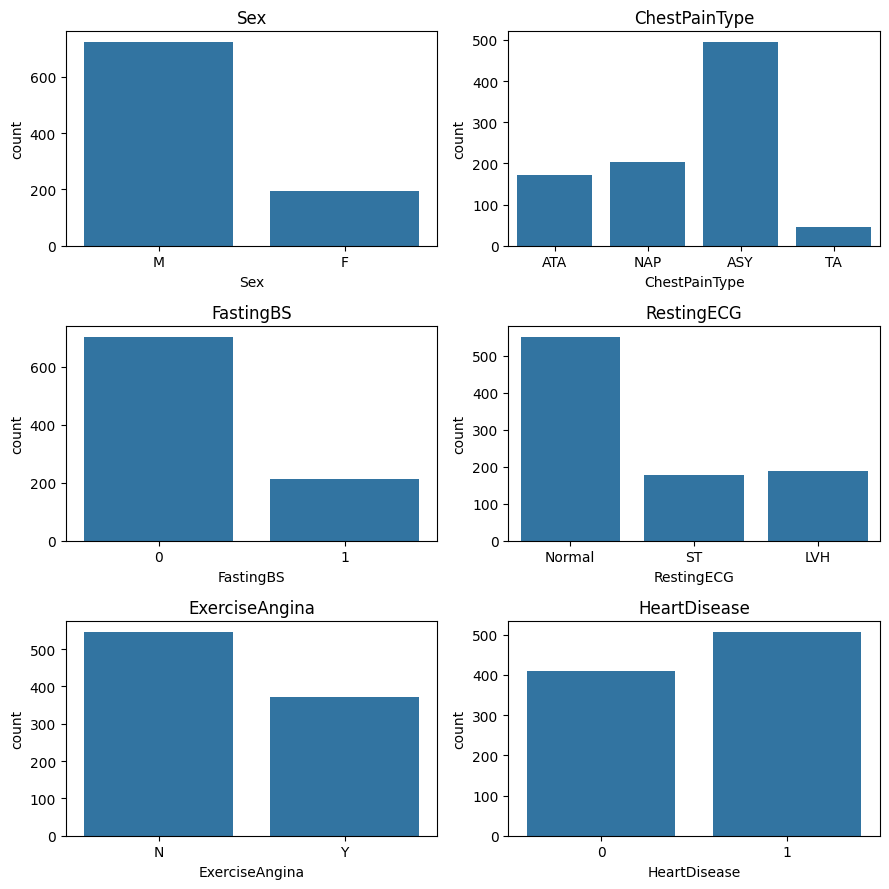

In [72]:
plt.figure(figsize=(9, 9))

for i, col in enumerate(cat_col):
    plt.subplot(3, 2, i + 1)
    sns.countplot(x=df[col])
    plt.title(col)

plt.tight_layout()

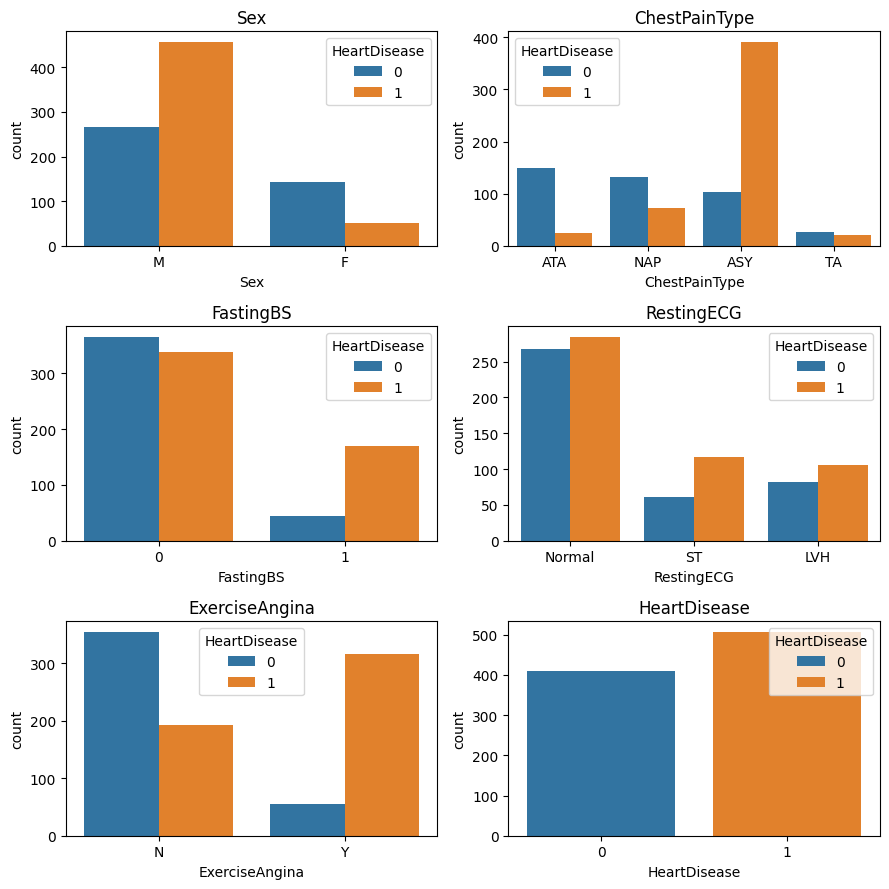

In [71]:
plt.figure(figsize=(9, 9))

for i, col in enumerate(cat_col):
    plt.subplot(3, 2, i + 1)
    sns.countplot(x=df[col], hue=df['HeartDisease'])
    plt.title(col)

plt.tight_layout()

#### preprocessing

In [73]:
df_clean = pd.get_dummies(df,drop_first=True,dtype='int8')
df_clean.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160.0,180.0,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130.0,283.0,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138.0,214.0,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150.0,195.0,0,122,0.0,0,1,0,1,0,1,0,0,0,1


In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']

df_clean[cols] = scaler.fit_transform(df_clean[cols])


In [76]:
df_clean.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.399697,0.832529,0,1.382928,-0.832432,0,1,1,0,0,1,0,0,0,1
1,-0.478484,1.489235,-1.212922,0,0.754157,0.105664,1,0,0,1,0,1,0,0,1,0
2,-1.751359,-0.145072,0.719935,0,-1.525138,-0.832432,0,1,1,0,0,0,1,0,0,1
3,-0.584556,0.290743,-0.574892,0,-1.132156,0.574711,1,0,0,0,0,1,0,1,1,0
4,0.051881,0.944466,-0.931438,0,-0.581981,-0.832432,0,1,0,1,0,1,0,0,0,1
